In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:

!unzip '/content/drive/My Drive/corpus-taln.zip' # Path to Zip File



Archive:  /content/drive/My Drive/corpus-taln.zip
   creating: corpus-taln/2/
  inflating: corpus-taln/2/ref.bib   
  inflating: corpus-taln/2/corpus_taln_v1.tei.xml  
  inflating: corpus-taln/2/exemple-article.xml  
  inflating: corpus-taln/2/tei_all.dtd  
  inflating: corpus-taln/2/doc_taln.pdf  
  inflating: corpus-taln/2/licenceATALA.html  
  inflating: corpus-taln/2/licenceATALA.txt  


# Parsing and Extracting the Data

In [ ]:
import xml.etree.ElementTree as et 

xtree = et.parse("/content/corpus-taln/2/corpus_taln_v1.tei.xml")
root = xtree.getroot()
print(root)

<Element '{http://www.tei-c.org/ns/1.0}teiCorpus' at 0x7f7ca68436d8>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

dataset_keywords_fr = "1998 a 2000" #1997 a 2000

*The data is divided into two sections : Keywords & Abstract , So First we will follow all the processes with keywords and later with the abstract in english and in French*

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
liste_de_dates = []
contenu_de_liste = []
type_data = []

In [ ]:

# date_list1 = []
for parent in root.iter('{http://www.tei-c.org/ns/1.0}TEI'):
  for date in parent.iter('{http://www.tei-c.org/ns/1.0}date'):
    liste_de_dates.append(int(date.text))
    # print(date.text)
    nbr_date = int(date.text)
    if (nbr_date < 2001) :
      for division in parent.iter('{http://www.tei-c.org/ns/1.0}div'):
        if (division.attrib == { 'type': 'keywords', '{http://www.w3.org/XML/1998/namespace}lang': 'fr' } ):
          for child in division :
            contenu_de_liste.append(child.text)
            type_data.append(division.attrib.get('type'))
            # print("CHild ===>" , child.text)
            # dataset_keywords_fr = dataset_keywords_fr + " " + child.text
# print(date_list1)
print(len(contenu_de_liste))
print(len(type_data),type_data)

170
170 ['keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywords', 'keywor

Cleaning the data and extracting the information of Years and it's contents for further processing


In [ ]:

print(len(liste_de_dates))
for parent in root.iter('{http://www.tei-c.org/ns/1.0}TEI'):
  for date in parent.iter('{http://www.tei-c.org/ns/1.0}date'):
    nbr_date = int(date.text)
    liste_de_dates.append(nbr_date)
    for division in parent.iter('{http://www.tei-c.org/ns/1.0}div'):
        if (division.attrib == { 'type': 'abstract', '{http://www.w3.org/XML/1998/namespace}lang': 'fr' } ):
          for child in division :
            contenu_de_liste.append(child.text)
            type_data.append(division.attrib.get('type'))

3204


In [ ]:

print(len(liste_de_dates))
print(len(contenu_de_liste))

6408
3374


In [ ]:


a = pd.Series(liste_de_dates)
b = pd.Series(contenu_de_liste)
c = pd.Series(type_data)
pred_df = pd.DataFrame([a,b,c]).transpose().replace(to_replace='None', value=np.nan).dropna()
pred_df.columns = ['Years','Contents','Type']
pred_df['Years'] = pred_df['Years'].astype(int)
pred_df.dropna()
pred_df.drop_duplicates()


Years                                           Contents      Type
48     1999  \ninterrogation de base de données, langage na...  keywords
62     1999  \nsémantique lexicale, prédicats, lexique géné...  keywords
80     1999  \nInférence grammaticale régulière, analyse co...  keywords
138    2000  \nannotation morpho-syntaxique, type de texte,...  keywords
144    2000  \nrecherche d'information, modèle vectoriel, a...  keywords
...     ...                                                ...       ...
3364   2000  \nDans cet article, nous présentons une approc...  abstract
3366   2000  \nCet article présente une méthodologie de dét...  abstract
3368   2000  \nLa génération automatique de poésie est une ...  abstract
3370   2000  \nNous proposons une architecture neuronale av...  abstract
3372   2000  \nNous présentons la base PolylexFLE, contenan...  abstract

[1548 rows x 3 columns]

# Tokenization

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import sent_tokenize
count = 0
sentences = []
for i , data in enumerate(range(len(pred_df))):
  count+=1
  sentences.append(sent_tokenize(str(pred_df.iloc[i]['Contents'])))
  # print(sentences)
print("ccccccccccc",count)

ccccccccccc 3096


In [ ]:
list(sentences[0])

["\ninterrogation de base de données, langage naturel, opérateurs linguistiques, transducteur (automate à nombre fini d'états)"]

# Pre-processing the Data and Applying NLP Algorithm

In [ ]:
import pandas as pd
sentences_series = pd.Series(sentences)
print(sentences_series[1])
# print(pred_df['Years'])
data_dict = {'contents' : sentences_series , 'years': pred_df['Years']}
df = pd.DataFrame(data_dict).dropna()
df['years'] = df['years'].replace(to_replace='None', value=np.nan).dropna().astype(int)
df.head()

["\ninterrogation de base de données, langage naturel, opérateurs linguistiques, transducteur (automate à nombre fini d'états)"]


contents  years
48  [\nSe déplacer à pied ou par un autre moyen es...   1999
49  [\nSe déplacer à pied ou par un autre moyen es...   1999
62  [\nL'action GRACE est le premier exemple d'app...   1999
63  [\nL'action GRACE est le premier exemple d'app...   1999
80  [\nLa morphologie médicale est riche et produc...   1999

In [ ]:
df.shape

(2820, 2)

In [ ]:
df['contents']

48      [\nSe déplacer à pied ou par un autre moyen es...
49      [\nSe déplacer à pied ou par un autre moyen es...
62      [\nL'action GRACE est le premier exemple d'app...
63      [\nL'action GRACE est le premier exemple d'app...
80      [\nLa morphologie médicale est riche et produc...
                              ...                        
3091    [\nLa génération automatique de poésie est une...
3092    [\nNous proposons une architecture neuronale a...
3093    [\nNous proposons une architecture neuronale a...
3094    [\nNous présentons la base PolylexFLE, contena...
3095    [\nNous présentons la base PolylexFLE, contena...
Name: contents, Length: 2820, dtype: object

In [ ]:
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
STOPWORDS_FR = set(stopwords.words('french'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    print("texxxxxxxxx",text)
    # if isinstance(text,list) and len(text) > 1:
    #   text = [BeautifulSoup(text_chunk, "html.parser").text for text_chunk in text]
    # else:
      
    text = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",          # Replace all non-letters with spaces
                        str(text))
    text = BeautifulSoup(text, "html.parser").text # HTML decoding
    print(" {} Cleameddddddddd".format(text))
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS_FR) # delete stopwors from text
    return text



In [ ]:
# # 

# def clean_text_fr(text):
#     """
#         text: a string
        
#         return: modified initial string
#     """
#     text = re.sub("[^a-zA-Z]",  # Search for all non-letters
#                           " ",          # Replace all non-letters with spaces
#                           str(text))
#     text = BeautifulSoup(text, "html.parser").text # HTML decoding
#     text = text.lower() # lowercase text
#     text = REPLACE_BY_SPACE_RE.sub(' ', str(text)) # replace REPLACE_BY_SPACE_RE symbols by space in text
#     text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
#     text = ' '.join(word for word in text.split() if word not in STOPWORDS_FR) # delete stopwors from text
#     return text

In [ ]:
%%time
df['data_cleaned'] = df['contents'].apply(clean_text)
df['data_cleaned'].drop_duplicates()

texxxxxxxxx ['\nSe déplacer à pied ou par un autre moyen est une activité humaine courante.', "Cependant, trouver son chemin suppose souvent des aides de type verbal (descriptions d'itinéraires) ou iconique\n(croquis, cartes).", "Nous présentons dans cet article un système capable de produire des descriptions d'itinéraires en métro.", 'Notre générateur est fondé sur un mod èle cognitif de la production de telles descriptions et sur une analyse de corpus.', "Nous montrons comment des facteurs\ncomme l'importance relative d'informations et les choix stylistiques peuvent faire varier à la\nfois le contenu et la forme de la description d'un itinéraire."]
    nSe d placer   pied ou par un autre moyen est une activit  humaine courante     Cependant  trouver son chemin suppose souvent des aides de type verbal  descriptions d itin raires  ou iconique n croquis  cartes      Nous pr sentons dans cet article un syst me capable de produire des descriptions d itin raires en m tro     Notre g n rate

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df.set_index('years')

contents                                       data_cleaned
years                                                                                                      
1999   [\nSe déplacer à pied ou par un autre moyen es...  nse placer pied autre moyen activit humaine co...
1999   [\nSe déplacer à pied ou par un autre moyen es...  nse placer pied autre moyen activit humaine co...
1999   [\nL'action GRACE est le premier exemple d'app...  nl action grace premier exemple application pa...
1999   [\nL'action GRACE est le premier exemple d'app...  nl action grace premier exemple application pa...
1999   [\nLa morphologie médicale est riche et produc...  nla morphologie dicale riche productive simple...
...                                                  ...                                                ...
2018   [\nLa génération automatique de poésie est une...  nla g ration automatique po sie che ardue syst...
2018   [\nNous proposons une architecture neuronale a...  nnous proposons architecture neuronale caract ...
2018   [\nNous proposons une architecture neuronale a...  nnous proposons architecture neuronale caract ...
2018   [\nNous présentons la base PolylexFLE, contena...  nnous pr sentons base polylexfle contenant exp...
2018   [\nNous présentons la base PolylexFLE, contena...  nnous pr sentons base polylexfle contenant exp...

[2820 rows x 2 columns]

# Retreiving Useful Keywords (EN)

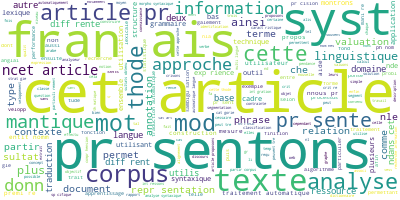

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.data_cleaned.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

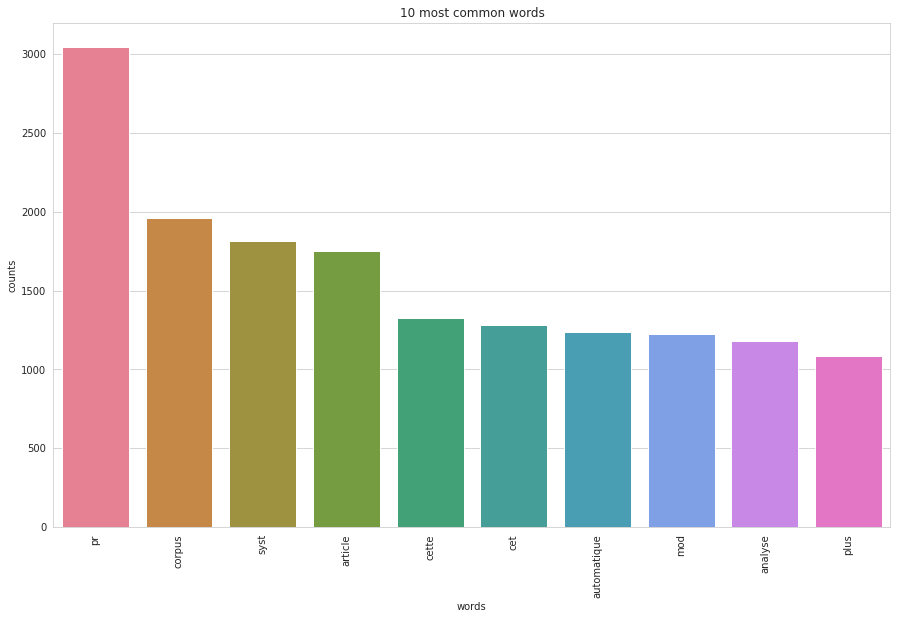

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df.data_cleaned)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# Using Gensim , Lemmatization, LDA , Bigram & Trigram Models to get the Coherence

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
pr analyse article syntaxique corpus grammaires grammaire mod cette repr

Topic #1:
pr corpus automatique article syst traduction sentons fran ais cet

Topic #2:
pr corpus mots article plus sens thode cette entre cet

Topic #3:
syst pr article analyse corpus cette donn automatique approche thode

Topic #4:
syst mod pr article entit cette sultats dialogue cet corpus


In [ ]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.data_cleaned.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['nse', 'placer', 'pied', 'autre', 'moyen', 'activit', 'humaine', 'courante', 'cependant', 'trouver', 'chemin', 'suppose', 'souvent', 'aides', 'type', 'verbal', 'descriptions', 'itin', 'raires', 'iconique', 'croquis', 'cartes', 'pr', 'sentons', 'cet', 'article', 'syst', 'capable', 'produire', 'descriptions', 'itin', 'raires', 'tro', 'rateur', 'fond', 'mod', 'cognitif', 'production', 'telles', 'descriptions', 'analyse', 'corpus', 'montrons', 'comment', 'facteurs', 'ncomme', 'importance', 'relative', 'informations', 'choix', 'stylistiques', 'peuvent', 'faire', 'varier', 'nfois', 'contenu', 'forme', 'description', 'itin', 'raire']]
CPU times: user 738 ms, sys: 34.6 ms, total: 773 ms
Wall time: 1.04 s


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['pie', 'suppose', 'souvent', 'aide', 'type', 'verbal', 'description', 'iconique', 'croquis', 'carte', 'senton', 'article', 'syst', 'capable', 'produire', 'description', 'itin_raire', 'rateur', 'fond', 'cognitif', 'production', 'telle', 'description', 'comment', 'facteur', 'ncomme', 'importance', 'relative', 'information', 'choix', 'stylistique', 'peuvent', 'faire', 'itin', 'raire']]


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"texte" + 0.016*"structure" + 0.015*"ressource" + 0.014*"cessaire" + '
  '0.014*"textuel" + 0.013*"autre" + 0.013*"seaux" + 0.013*"exploitant" + '
  '0.013*"information" + 0.012*"thode"'),
 (1,
  '0.022*"article" + 0.022*"thode" + 0.022*"mantique" + 0.021*"relation" + '
  '0.016*"base" + 0.015*"sous" + 0.015*"tection" + 0.013*"travaux" + '
  '0.012*"rence" + 0.012*"tape"'),
 (2,
  '0.035*"traduction" + 0.022*"term" + 0.015*"performance" + 0.014*"ressource" '
  '+ 0.013*"mantique" + 0.012*"thode" + 0.012*"cette" + 0.012*"base" + '
  '0.011*"sultat" + 0.011*"article"'),
 (3,
  '0.068*"annotation" + 0.041*"texte" + 0.030*"concept" + 0.026*"nnous" + '
  '0.024*"senton" + 0.018*"proposon" + 0.018*"tiquetage" + 0.014*"current" + '
  '0.014*"article" + 0.013*"multi"'),
 (4,
  '0.025*"expression" + 0.021*"question" + 0.017*"extraction" + 0.017*"syst" + '
  '0.015*"sultat" + 0.014*"mantique" + 0.014*"ndan" + 0.013*"cet" + '
  '0.013*"tude" + 0.013*"conversation"'),
 (5,
  '0.026*"

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.29507778957795416


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [2:35:42<00:00, 17.30s/it]


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

# Machine Learning Algorithm for Year Prediction

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 1.5MB 5.9MB/s 
     |████████████████████████████████| 890kB 38.0MB/s 
     |████████████████████████████████| 2.9MB 55.0MB/s 


In [ ]:
from __future__ import print_function
import ipywidgets as widgets
from transformers import pipeline

Sentence Classification -Sentiment Analysis

In [ ]:

from collections import Counter
nlp_sentence_classif = pipeline('sentiment-analysis')
scores = []
print(len(df))
for i in range(2600):
    print("I=======>",i)
    lables = nlp_sentence_classif(df.iloc[i]['contents'])
    print("oooooooo==========>",lables)
    scores.append([dict(Counter(["POS" if text.get('label') == "POSITIVE" else "NEG" for text in lables])), df.iloc[i]['years']])
# print("Scores ==>",scores[0][0])
# print("sc 1========>",[sc for sc in scores[0]])


Streaming output truncated to the last 5000 lines.
I=======> 100
oooooooo==========> [{'label': 'NEGATIVE', 'score': 0.9411483407020569}, {'label': 'NEGATIVE', 'score': 0.9780759811401367}, {'label': 'NEGATIVE', 'score': 0.993499219417572}, {'label': 'NEGATIVE', 'score': 0.9830736517906189}, {'label': 'POSITIVE', 'score': 0.5308752655982971}, {'label': 'POSITIVE', 'score': 0.5368782877922058}]
I=======> 101
oooooooo==========> [{'label': 'NEGATIVE', 'score': 0.9411483407020569}, {'label': 'NEGATIVE', 'score': 0.9780759811401367}, {'label': 'NEGATIVE', 'score': 0.993499219417572}, {'label': 'NEGATIVE', 'score': 0.9830736517906189}, {'label': 'POSITIVE', 'score': 0.5308752655982971}, {'label': 'POSITIVE', 'score': 0.5368782877922058}]
I=======> 102
oooooooo==========> [{'label': 'NEGATIVE', 'score': 0.937515377998352}, {'label': 'NEGATIVE', 'score': 0.569221556186676}]
I=======> 103
oooooooo==========> [{'label': 'NEGATIVE', 'score': 0.937515377998352}, {'label': 'NEGATIVE', 'score': 0.5

In [ ]:





df[['POS','NEG']] = pd.DataFrame([sco[0].values() for sco in scores])
df['POS'] = pd.to_numeric(df['POS'], errors='coerce')
df['NEG'] = pd.to_numeric(df['NEG'], errors='coerce')
df = df.dropna(subset=['POS'])
df = df.dropna(subset=['NEG'])
df['POS'] = df['POS'].astype(int)
df['NEG'] = df['NEG'].astype(int)
df.head()

contents  years  ... POS  NEG
48   [\nSe déplacer à pied ou par un autre moyen es...   1999  ...   2    1
49   [\nSe déplacer à pied ou par un autre moyen es...   1999  ...   2    1
80   [\nLa morphologie médicale est riche et produc...   1999  ...   3    1
81   [\nLa morphologie médicale est riche et produc...   1999  ...   3    1
144  [\nDans cet article, nous montrons comment le ...   2000  ...   6    4

[5 rows x 5 columns]

In [ ]:
def statement_polarity(pos , neg):
  print("neg--------------",neg)
  print("POS-------",pos)
  if pos == neg:
    return "NEUTRAL"
  elif pos > neg:
    return "POSITIVE STATEMENT"
  else:
    return "NEGATIVE STATEMENT"


In [ ]:
df['statement_type'] = df.apply(lambda x: statement_polarity(x['POS'], x['NEG']), axis=1)

neg-------------- 1
POS------- 2
neg-------------- 1
POS------- 2
neg-------------- 1
POS------- 3
neg-------------- 1
POS------- 3
neg-------------- 4
POS------- 6
neg-------------- 4
POS------- 6
neg-------------- 2
POS------- 5
neg-------------- 2
POS------- 5
neg-------------- 1
POS------- 2
neg-------------- 1
POS------- 2
neg-------------- 1
POS------- 4
neg-------------- 1
POS------- 4
neg-------------- 1
POS------- 2
neg-------------- 1
POS------- 2
neg-------------- 2
POS------- 2
neg-------------- 2
POS------- 2
neg-------------- 2
POS------- 1
neg-------------- 2
POS------- 1
neg-------------- 2
POS------- 4
neg-------------- 2
POS------- 4
neg-------------- 5
POS------- 1
neg-------------- 5
POS------- 1
neg-------------- 2
POS------- 4
neg-------------- 2
POS------- 4
neg-------------- 3
POS------- 3
neg-------------- 3
POS------- 3
neg-------------- 7
POS------- 1
neg-------------- 7
POS------- 1
neg-------------- 1
POS------- 6
neg-------------- 1
POS------- 6
neg-------

In [ ]:
df

contents  ...      statement_type
48    [\nSe déplacer à pied ou par un autre moyen es...  ...  POSITIVE STATEMENT
49    [\nSe déplacer à pied ou par un autre moyen es...  ...  POSITIVE STATEMENT
80    [\nLa morphologie médicale est riche et produc...  ...  POSITIVE STATEMENT
81    [\nLa morphologie médicale est riche et produc...  ...  POSITIVE STATEMENT
144   [\nDans cet article, nous montrons comment le ...  ...  POSITIVE STATEMENT
...                                                 ...  ...                 ...
2595  [\nNous présentons une méthode pour créer rapi...  ...  POSITIVE STATEMENT
2596  [\nLa détection d'opinion ciblée a pour but d'...  ...  NEGATIVE STATEMENT
2597  [\nLa détection d'opinion ciblée a pour but d'...  ...  NEGATIVE STATEMENT
2598  [\nCet article entend dresser, dans un premier...  ...  POSITIVE STATEMENT
2599  [\nCet article entend dresser, dans un premier...  ...  POSITIVE STATEMENT

[1578 rows x 6 columns]

In [ ]:
df[df['years'] == 1999]

contents  ...      statement_type
48  [\nSe déplacer à pied ou par un autre moyen es...  ...  POSITIVE STATEMENT
49  [\nSe déplacer à pied ou par un autre moyen es...  ...  POSITIVE STATEMENT
80  [\nLa morphologie médicale est riche et produc...  ...  POSITIVE STATEMENT
81  [\nLa morphologie médicale est riche et produc...  ...  POSITIVE STATEMENT

[4 rows x 6 columns]

In [ ]:
df.groupby(['years'])['POS'].sum()

years
1999     10
2000     38
2001    144
2002    204
2003    234
2004    328
2005    356
2006    300
2007    444
2008    246
2009    370
2010    352
2011    462
2012    246
2013    392
2014    394
2015    106
Name: POS, dtype: int64

In [ ]:
df.groupby(['years'])['NEG'].sum()

years
1999      4
2000     18
2001    108
2002    148
2003    184
2004    188
2005    244
2006    228
2007    256
2008    206
2009    272
2010    294
2011    324
2012    164
2013    316
2014    298
2015     72
Name: NEG, dtype: int64

In [ ]:
df[df['years'] == df.groupby(['years'])['NEG'].sum().idxmax()]

contents  ...      statement_type
1750  [\nDans cet article, nous proposons de modélis...  ...  POSITIVE STATEMENT
1751  [\nDans cet article, nous proposons de modélis...  ...  POSITIVE STATEMENT
1754  [\nCette recherche s'inscrit dans le champ de ...  ...  POSITIVE STATEMENT
1755  [\nCette recherche s'inscrit dans le champ de ...  ...  POSITIVE STATEMENT
1756  [\nLa multiplication des travaux sur corpus, e...  ...  NEGATIVE STATEMENT
...                                                 ...  ...                 ...
1977  [\nLes ressources lexicales sont cruciales pou...  ...             NEUTRAL
1978  [Le travail présenté dans cet article est cent...  ...  POSITIVE STATEMENT
1979  [Le travail présenté dans cet article est cent...  ...  POSITIVE STATEMENT
1980  [\nA partir de l'évaluation d'extracteurs de t...  ...  POSITIVE STATEMENT
1981  [\nA partir de l'évaluation d'extracteurs de t...  ...  POSITIVE STATEMENT

[158 rows x 6 columns]

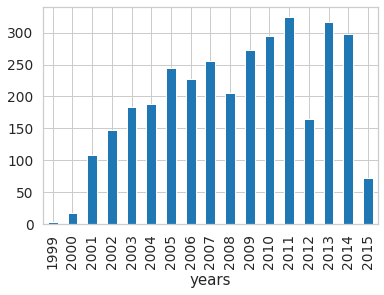

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby(['years'])['NEG'].sum().plot(kind='bar')

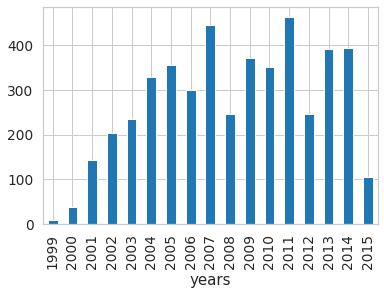

In [ ]:
df.groupby(['years'])['POS'].sum().plot(kind='bar')

# ML

In [ ]:
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(df[['POS','NEG']],df['years'],random_state=42,test_size=0.33)


In [ ]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier(n_neighbors=5)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVC' , SVC(kernel='linear')))
    
    return basedModels

In [ ]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    res_pred = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        cv_pred = cross_val_predict(model, X_train, y_train, cv=kfold)
        fig, ax = plt.subplots()
        ax.scatter(y_train, cv_pred)
        ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
        ax.set_xlabel(name)
        ax.set_ylabel('Predicted')
        plt.show()
        res_pred.append(cv_pred)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return names, results


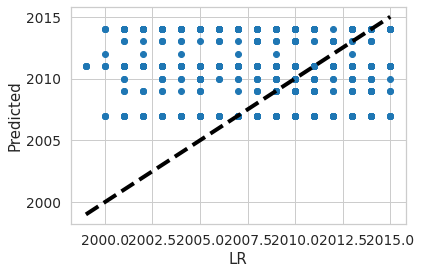

LR: 0.091770 (0.016391) 


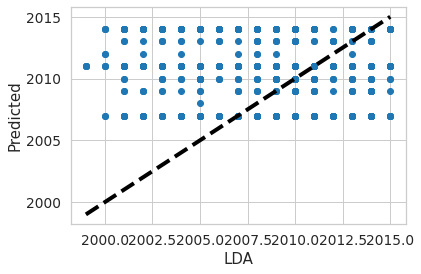

LDA: 0.087053 (0.015776) 


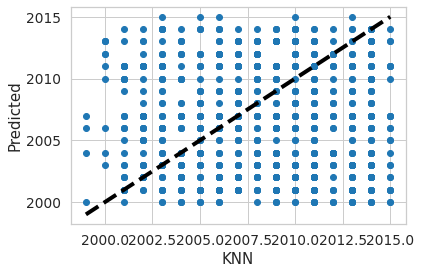

KNN: 0.083252 (0.015673) 


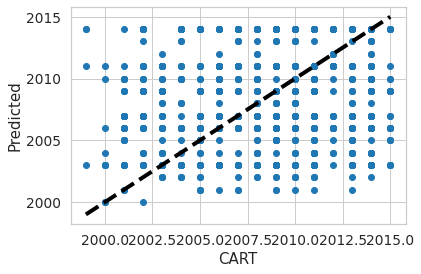

CART: 0.102129 (0.028739) 


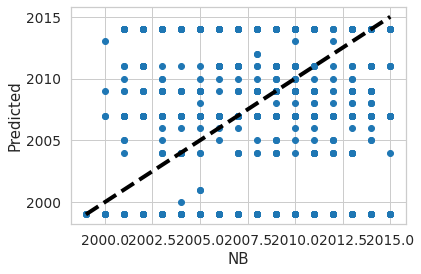

NB: 0.071905 (0.015366) 


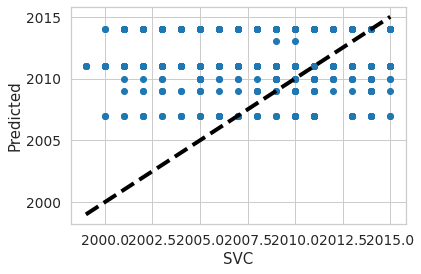

SVC: 0.088949 (0.012962) 


In [ ]:
SEED = 7
np.random.seed(SEED)
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipe1 = Pipeline([('scaler', StandardScaler()),
                 ('pca',PCA()),
                 ('lin',LinearRegression()),
                 ])

pipe2 = Pipeline([('scaler2',StandardScaler()),
                 ('pca2',PCA(n_components=2)),
                 ('decesion',DecisionTreeClassifier())])

pipe3 = Pipeline([('scaler3',StandardScaler()),
                 ('pca3',PCA(n_components=2)),
                 ('random',SVC(kernel='linear'))])

In [ ]:
print(X_test)

      POS  NEG
2111    5    1
1405    1    6
1960    3    1
1000    1    3
972     3    2
...   ...  ...
1385    5    1
2078    3    3
737     5    1
2179    3    3
497     2    3

[521 rows x 2 columns]


In [ ]:
pipeline = [pipe1,pipe2,pipe3]
for p in pipeline:
  p.fit(X_train,y_train)
  p.predict(X_test)
  print("Name ==>{} : Score ==> {}".format(p.steps[2][1],p.score(X_test,y_test)))

Name ==>LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) : Score ==> 0.003733025201173912
Name ==>DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : Score ==> 0.11516314779270634
Name ==>SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) : Score ==> 0.09980806142034548
